In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Read the image from folder

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Path
image_file_path = '/content/drive/MyDrive/AI Class/data_processing/images/flower.jpg'

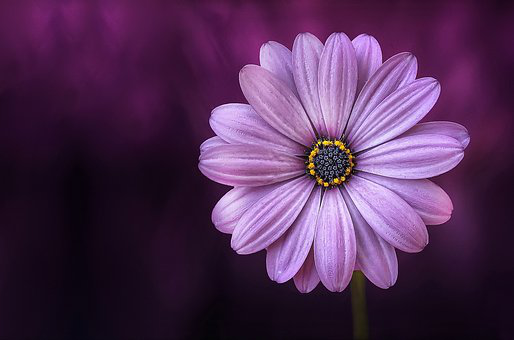

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_file_path)
image

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_file_path)
image = np.array(image)
image = tf.convert_to_tensor(image)

In [ ]:
print(image)

tf.Tensor(
[[[81 24 69]
  [81 24 69]
  [81 24 69]
  ...
  [32  7 29]
  [34  9 30]
  [34  9 30]]

 [[81 24 69]
  [81 24 69]
  [81 24 69]
  ...
  [33  8 30]
  [34  9 30]
  [34  9 30]]

 [[81 24 69]
  [81 24 69]
  [81 24 69]
  ...
  [34  9 31]
  [37  9 32]
  [37  9 32]]

 ...

 [[25 12 29]
  [25 12 29]
  [24 11 28]
  ...
  [20  5 24]
  [20  7 25]
  [20  7 25]]

 [[24 11 28]
  [24 11 28]
  [24 11 28]
  ...
  [20  5 24]
  [20  7 25]
  [20  7 25]]

 [[22  9 26]
  [22  9 26]
  [22  9 26]
  ...
  [20  5 24]
  [20  7 25]
  [20  7 25]]], shape=(340, 514, 3), dtype=uint8)


# Data Augmentation

In [ ]:
def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1, 2, 1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1, 2, 2)
  plt.title('Augmented image')
  plt.imshow(augmented)

## Flipped

In [ ]:
flipped = tf.image.flip_left_right(image)

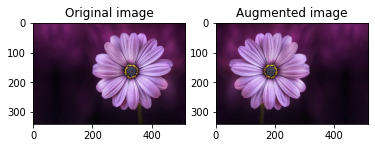

In [ ]:
visualize(image.numpy(), flipped.numpy())

## Grayscale an image

In [ ]:
grayscaled = tf.image.rgb_to_grayscale(image)

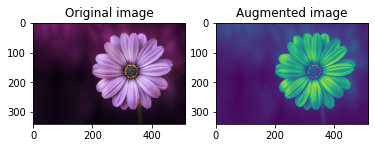

In [ ]:
visualize(image.numpy(), tf.squeeze(grayscaled))

## Saturate an image

In [ ]:
saturated = tf.image.adjust_saturation(image, 3)

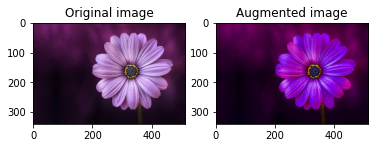

In [ ]:
visualize(image.numpy(), saturated.numpy())

## Change image brightness

In [ ]:
bright = tf.image.adjust_brightness(image, 0.4)

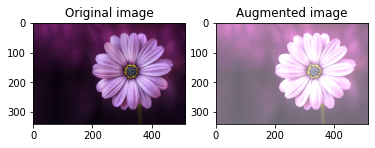

In [ ]:
visualize(image.numpy(), bright.numpy())

## Center crop an image

In [ ]:
cropped = tf.image.central_crop(image, central_fraction=0.5)

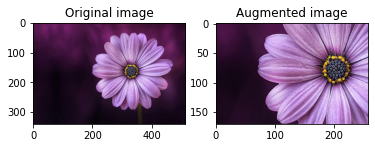

In [ ]:
visualize(image.numpy(), cropped.numpy())

## Rotate an image

In [ ]:
rotated = tf.image.rot90(image)

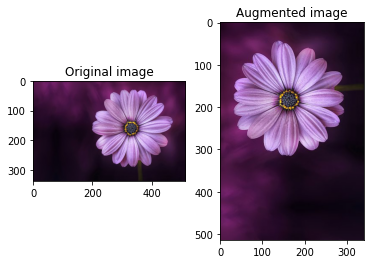

In [ ]:
visualize(image.numpy(), rotated.numpy())

In [5]:
emotions = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral'
}

In [6]:
import os
from tqdm import tqdm
from tensorflow import keras
import tensorflow as tf
import numpy as np

2023-10-19 13:52:05.983257: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Preprocess Dataset

## Read the data

In [10]:
dataset_path = 'C:/Users/starp/Inha/인공지능/dataset'

In [11]:
all_images = []
all_labels = []

for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    print(folder)

    for file in tqdm(os.listdir(folder_path)):
        file_path = os.path.join(folder_path, file)

        image = tf.keras.preprocessing.image.load_img(file_path)
        image = np.array(image)
        image = tf.convert_to_tensor(image)

        image = tf.image.resize(image, [128, 128])

        all_images.append(image)
        all_labels.append(folder)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/starp/Inha/인공지능/dataset'

In [ ]:
num_of_classes = 7
all_labels = np.asarray(all_labels, dtype=np.float32)
all_labels = keras.utils.to_categorical(all_labels, num_of_classes)

In [ ]:
all_images = np.asarray(all_images, dtype=np.float32)

1


100%|██████████| 108/108 [00:02<00:00, 47.34it/s] 


0


100%|██████████| 360/360 [00:05<00:00, 63.18it/s] 


3


100%|██████████| 312/312 [00:04<00:00, 66.59it/s] 


2


100%|██████████| 87/87 [00:24<00:00,  3.51it/s]


6


100%|██████████| 965/965 [00:18<00:00, 52.49it/s] 


4


100%|██████████| 457/457 [00:07<00:00, 63.41it/s] 


5


100%|██████████| 274/274 [00:03<00:00, 74.01it/s] 


In [ ]:
print('All images: ', all_images.shape)
print('All labels: ', all_labels.shape)

All images:  (2563, 128, 128, 3)
All labels:  (2563, 7)


## Split the data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_images, test_val_images, train_labels, test_val_labels = train_test_split(all_images, all_labels, test_size=0.5,random_state=42)
test_images, val_images, test_labels, val_labels = train_test_split(test_val_images, test_val_labels, test_size=0.5, random_state=42)

print('Train data: ', train_images.shape, train_labels.shape)
print('Val data: ', val_images.shape, val_labels.shape)
print('Test data: ', test_images.shape, test_labels.shape)

Train data:  (1794, 128, 128, 3) (1794, 7)
Val data:  (385, 128, 128, 3) (385, 7)
Test data:  (384, 128, 128, 3) (384, 7)


Label array: [0. 0. 0. 0. 0. 0. 1.] 
Label: 6 
Emotion: Neutral 
Image shape: (128, 128, 3)


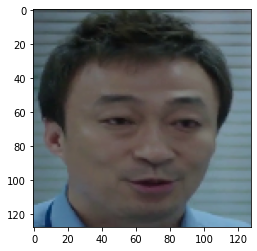

In [ ]:
emotions = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral'
}

index = 15
print('Label array:', train_labels[index],
      '\nLabel:', np.argmax(train_labels[index]),
      '\nEmotion:', emotions[np.argmax(train_labels[index])],
      '\nImage shape:', train_images[index].shape)

plt.imshow(np.asarray(train_images[index], dtype='uint8'))
plt.show()

## Augment Training set

In [ ]:
def augmen_single_example(image, label):
    image = tf.convert_to_tensor(image)

    flipped = tf.image.flip_left_right(image)
    saturated = tf.image.adjust_saturation(image, 3)

    augmented_images = [
        flipped.numpy(),
        saturated.numpy()
    ]
    augmented_labels = [label] * len(augmented_images)

    return augmented_images, augmented_labels

In [ ]:
augmented_train_images, augmented_train_labels = [], []

for i in tqdm(range(train_images.shape[0])):
    aug_images, aug_labels = augment_single_example(train_images[i], train_labels[i])

    augmented_train_images.extend(aug_images)
    augmented_train_labels.extend(aug_labels)

augmented_train_images = np.asarray(augmented_train_images, dtype=np.float32)
augmented_train_labels = np.asarray(augmented_train_labels, dtype=np.float32)

print('Augmented images: ', augmented_train_images.shape)
print('Augmented labels: ', augmented_train_labels.shape)

100%|██████████| 1794/1794 [00:01<00:00, 1123.31it/s]


Augmedted images:  (3588, 128, 128, 3)
Augmedted labels:  (3588, 7)


### Combine with original train data

In [ ]:
train_images = np.append(train_images, augmented_train_images, axis=0)
train_labels = np.append(train_labels, augmented_train_labels, axis=0)

print('Train data: ', train_images.shape, train_labels.shape)

Train data:  (5382, 128, 128, 3) (5382, 7)


## Normalize the data

In [ ]:
# normalization
train_images /= 255
val_images /= 255
test_images /= 255

# Make model

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
input_shape = (128, 128, 3)


model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(7, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dropout (Dropout)           (None, 57600)             0

# Train Model

### Set Training Parameters

In [ ]:
batch_size = 512
epochs = 10

#Compliling the model with adam optimixer and categorical crossentropy loss
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
batch_size = 512
epochs = 10

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)

optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

### Train Model

In [ ]:
history = model.fit(
    train_images, train_labels,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(val_images, val_labels),
    verbose=1)

Epoch 1/10
11/11 [==============================] - 126s 11s/step - loss: 1.7694 - accuracy: 0.3564 - val_loss: 1.6963 - val_accuracy: 0.3714
Epoch 2/10
11/11 [==============================] - 124s 11s/step - loss: 1.7157 - accuracy: 0.3768 - val_loss: 1.6855 - val_accuracy: 0.3714
Epoch 3/10
11/11 [==============================] - 122s 11s/step - loss: 1.7097 - accuracy: 0.3768 - val_loss: 1.6853 - val_accuracy: 0.3714
Epoch 4/10
11/11 [==============================] - 122s 11s/step - loss: 1.7048 - accuracy: 0.3768 - val_loss: 1.7003 - val_accuracy: 0.3714
Epoch 5/10
11/11 [==============================] - 122s 11s/step - loss: 1.7054 - accuracy: 0.3768 - val_loss: 1.6889 - val_accuracy: 0.3714
Epoch 6/10
11/11 [==============================] - 124s 11s/step - loss: 1.7008 - accuracy: 0.3768 - val_loss: 1.6996 - val_accuracy: 0.3714
Epoch 7/10
11/11 [==============================] - 123s 11s/step - loss: 1.7014 - accuracy: 0.3768 - val_loss: 1.6890 - val_accuracy: 0.3714
Epoch 

### Analyze Training Process

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


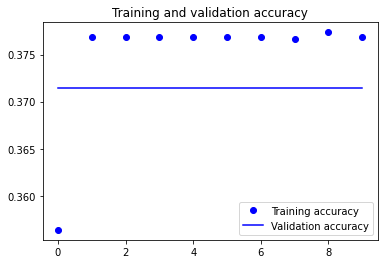

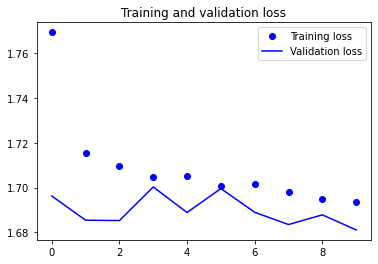

In [ ]:
print(history.history.keys())
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(list(range(epochs)), train_accuracy, 'bo', label='Training accuracy')
plt.plot(list(range(epochs)), val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(list(range(epochs)), train_loss, 'bo', label='Training loss')
plt.plot(list(range(epochs)), val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Evaluate Model

## Test

In [ ]:
loss, accuracy = model.evaluate(test_images, test_labels, verbose=1)
print('Loss:', loss, '\nAccuracy:', accuracy * 100, '%')

12/12 [==============================] - 2s 186ms/step - loss: 1.7011 - accuracy: 0.3802
Loss: 1.701125979423523 
Accuracy: 38.02083432674408 %


## Sample Prediction

Image shape: (128, 128, 3)
True Image Label Array: [1. 0. 0. 0. 0. 0. 0.] 
True Image Label Shape: (7,) 
True Image Label: Angry


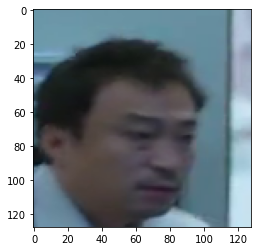

1/1 [==============================] - 0s 103ms/step
Predicted Image Label Array: ['0.15', '0.05', '0.03', '0.15', '0.13', '0.10', '0.38'] 
Predicted Image Label Shape: (1, 7) 
Predicted Image Label: Neutral


In [ ]:
img_id = 0

sample_test_image = test_images[img_id]
sample_test_label = test_labels[img_id]

print('Image shape:', sample_test_image.shape)
print('True Image Label Array:', sample_test_label,
      '\nTrue Image Label Shape:', sample_test_label.shape,
      '\nTrue Image Label:', emotions[np.argmax(sample_test_label)])
plt.imshow(sample_test_image)
plt.show()



prediction = model.predict(sample_test_image.reshape(1, 128, 128, 3))

print('Predicted Image Label Array:', ['{0:0.2f}'.format(i) for i in prediction[0]],
      '\nPredicted Image Label Shape:', prediction.shape,
      '\nPredicted Image Label:', emotions[np.argmax(prediction)])